In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

from subprocess import check_output

# Any results you write to the current directory are saved as output.
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [2]:
data = pd.read_csv('full_data_with_dates.csv')

In [3]:
small_data = data[['Day','Month','Year','Date']]

In [4]:
before_uber = small_data[small_data['Year']<=2011]

In [5]:
after_uber = small_data[small_data['Year']>=2013]

In [6]:
uber_dist = list(after_uber.groupby(['Date']).count().Day)
other_dist = list(before_uber.groupby(['Date']).count().Day)

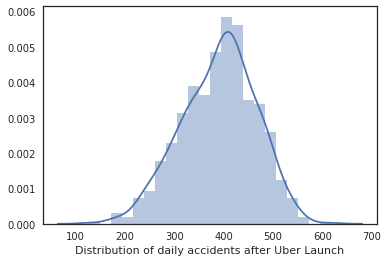

In [15]:
sns.distplot(uber_dist, axlabel='Distribution of daily accidents after Uber Launch')

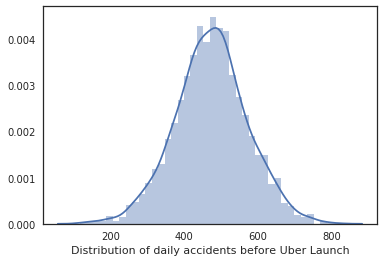

In [16]:
sns.distplot(other_dist, axlabel='Distribution of daily accidents before Uber Launch')

In [12]:
z_score = 1.645
mean_uber = np.mean(uber_dist)
mean_others = np.mean(other_dist)
uber_var = np.var(uber_dist)
others_var = np.var(other_dist)
ci_max = (mean_uber - mean_others) + (z_score*np.sqrt(uber_var/len(uber_dist)+others_var/len(other_dist)))
ci_min = (mean_uber - mean_others) - (z_score*np.sqrt(uber_var/len(uber_dist)+others_var/len(other_dist)))


In [13]:
ci_max

-77.43931764972328

In [14]:
ci_min

-88.6143706903629